

A : 
Value of A at middle point :  0.0025606706160137336


Text(0.5, 1.0, 'A vs x')

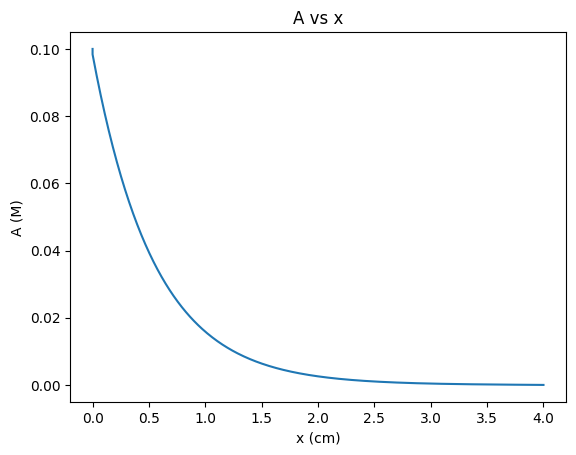

In [39]:
# This creates the system of linear equations and then solves it
D = 1.5 * 10**(-6)
k = 5 * 10**(-6)
dx = 0.009
A_start = 0.1
A_end = 0
L = 4
alpha =  (2 + (k/D)*(dx**2))
n = int(L/dx)

A = []

for i in range(n):
    row = []
    for j in range(n):
        if j == i-1 or j == i+1 :
            row.append(1)
        elif j == i:
            row.append(-alpha)
        else :
            row.append(0)
    A.append(row)

B = [-A_start]
for j in range(n-2):
    B.append(0)
B.append(A_end)
# print(A)
# print(B)

#This code genrates L and U and then substitutes to get roots

L = []
for i in range(n):
    L.append([0.0] * (n))
for i in range(n):
    L[i][i] = 1

U = []
for i in range(n):
    U.append([0.0] * (n))

def forwardElimination(A,L,U):
    for j in range(n):
        for k in range(j+1,n) :
            f_kj = A[k][j]/A[j][j]
            L[k][j] = f_kj
            for l in range(n):
                A[k][l]=A[k][l] - (f_kj)*A[j][l]
    for q in range(n):
        for p in range(n):
            U[q][p] = A[q][p]

forwardElimination(A,L,U)
# print('\n')
# print("L is : ")
# for m in range(n):
#     print(L[m])

def forwardSubstituation(L,B):
    D = [0]*n
    p=n-2
    D[n-1] = B[n-1]/L[n-1][n-1]
    p = 0
    while p<n:
        D[p] = (B[p] - sum((mul(L[p],D))))/(L[p][p])
        p+=1
    return D

def mul(A,B):
    P = []
    for i in range(len(A)):
        P.append(A[i]*B[i])
    return P

def backSubstitution(A,B) : 
    roots = [0]*n
    roots[n-1]=B[n-1]/A[n-1][n-1]
    p=n-2
    while p>-1:
        roots[p] = (B[p] - sum((mul(A[p],roots))))/(A[p][p])
        p-=1
    return roots

# print('\n')
# print("U is : ")
# for m in range(n):
#     print(U[m])

D = forwardSubstituation(L,B)
print("\n")
roots = backSubstitution(U,D)
print("A : ")
print("Value of A at middle point : ",roots[len(roots)//2])

roots.insert(0,A_start)
roots.append(A_end)



import matplotlib.pyplot as plt
x = []
x_end = 4
for k in range(int(x_end/dx)):
    x.append(k*dx)
x.insert(0,0)
x.append(4)

plt.plot(x,roots)
plt.xlabel("x (cm)")
plt.ylabel("A (M)")
plt.title('A vs x')